## Using twitter documentation


In [80]:
import os
from dotenv import load_dotenv
import requests
import requests_oauthlib
import json
import pandas as pd
import numpy as np
import re

In [2]:
load_dotenv()
ACCESS_TOKEN = os.getenv("ACCESS_TOKEN")
ACCESS_SECRET = os.getenv("ACCESS_SECRET")
CONSUMER_KEY = os.getenv("CONSUMER_KEY")
CONSUMER_SECRET = os.getenv("CONSUMER_SECRET")

In [3]:
my_auth = requests_oauthlib.OAuth1(CONSUMER_KEY, CONSUMER_SECRET,ACCESS_TOKEN,
ACCESS_SECRET)

In [4]:
"""import GetOldTweets3 as got

tweetCriteria = got.manager.TweetCriteria().setUsername("barackobama")\
                                           .setSince("2015-09-10")\
                                           .setUntil("2016-01-01")\
                                           .setMaxTweets(1)\
                                           .setEmoji("unicode")

tweet = got.manager.TweetManager.getTweets(tweetCriteria)

text_tweets = [[tw.username,
                tw.text,
                tw.date,
                tw.retweets,
                tw.favorites,
                tw.mentions,
                tw.hashtags] for tw in tweet
               
text_tweets"""

'import GetOldTweets3 as got\n\ntweetCriteria = got.manager.TweetCriteria().setUsername("barackobama")                                           .setSince("2015-09-10")                                           .setUntil("2016-01-01")                                           .setMaxTweets(1)                                           .setEmoji("unicode")\n\ntweet = got.manager.TweetManager.getTweets(tweetCriteria)\n\ntext_tweets = [[tw.username,\n                tw.text,\n                tw.date,\n                tw.retweets,\n                tw.favorites,\n                tw.mentions,\n                tw.hashtags] for tw in tweet\n               \ntext_tweets'

## Choose user

In [5]:
user = "BarackObama"

## 1. Get twitter mentions

In [6]:
"""def get_tweet_mentions(user, date):
    url = f'https://api.twitter.com/1.1/search/tweets.json?q=%40{user}&count=100&tweet_mode=extended&until={date}'
    response = requests.get(url, auth=my_auth, stream=True)
    print(url, response)
    return response.json()
mentions = get_tweet_mentions(user, "2020-07-26")"""
#should add count, result type: recent/popular

'def get_tweet_mentions(user, date):\n    url = f\'https://api.twitter.com/1.1/search/tweets.json?q=%40{user}&count=100&tweet_mode=extended&until={date}\'\n    response = requests.get(url, auth=my_auth, stream=True)\n    print(url, response)\n    return response.json()\nmentions = get_tweet_mentions(user, "2020-07-26")'

In [7]:
"""tweet_mentions = []
for i in range(len(mentions["statuses"])):
    try: 
        tweet_mentions.append(mentions["statuses"][i]['retweeted_status']['full_text'])
    except: 
        tweet_mentions.append(mentions["statuses"][i]["full_text"])"""

'tweet_mentions = []\nfor i in range(len(mentions["statuses"])):\n    try: \n        tweet_mentions.append(mentions["statuses"][i][\'retweeted_status\'][\'full_text\'])\n    except: \n        tweet_mentions.append(mentions["statuses"][i]["full_text"])'

In [8]:
# Retweets get cut with this code
"""tweet_mentions = []
for i in range(len(j["statuses"])):
    #count verified opinions x10
    
    if j["statuses"][i]["user"]["verified"]==False: 
        tweet_mentions.append(j["statuses"][i]["full_text"])
    elif j["statuses"][i]["user"]["verified"]==True: 
        tweet_mentions.extend([j["statuses"][i]["full_text"] for l in range(10)])"""

'tweet_mentions = []\nfor i in range(len(j["statuses"])):\n    #count verified opinions x10\n    \n    if j["statuses"][i]["user"]["verified"]==False: \n        tweet_mentions.append(j["statuses"][i]["full_text"])\n    elif j["statuses"][i]["user"]["verified"]==True: \n        tweet_mentions.extend([j["statuses"][i]["full_text"] for l in range(10)])'

Parameters:
lang ==> en
count ==> 100
until ==> (Returns tweets created before the given date. Date should be formatted as YYYY-MM-DD. Keep in mind that the search index has a 7-day limit. In other words, no tweets will be found for a date older than one week)

## 2. Get tweets from user

In [9]:
def get_tweets(user):
    url = f'https://api.twitter.com/1.1/statuses/user_timeline.json?screen_name={user}&count=100&tweet_mode=extended'
    response = requests.get(url, auth=my_auth, stream=True)
    print(url, response)
    return response.json()

In [10]:
user_t = get_tweets(user)

https://api.twitter.com/1.1/statuses/user_timeline.json?screen_name=BarackObama&count=100&tweet_mode=extended <Response [200]>


In [11]:
id_ = []
retweet_count = []
tweet = []
time = []
for i in range(len(user_t)):
    id_.append(user_t[i]["id_str"])
    retweet_count.append(user_t[i]["retweet_count"])
    time.append(user_t[i]['created_at'])
    try:
        tweet.append(user_t[i]['retweeted_status']['full_text'])
    except: 
        tweet.append(user_t[i]["full_text"])

In [12]:
d = {"id":id_, "time":time, "tweet": tweet, "retweets":retweet_count}
data = pd.DataFrame(data = d)

In [13]:
data

,id,time,tweet,retweets
0,1288149277861195787,Tue Jul 28 16:28:15 +0000 2020,It's National Vote By Mail Day. Voting by mail...,50417
1,1288148827816460289,Tue Jul 28 16:26:27 +0000 2020,Arianna’s a supporter of our campaign who’s be...,7713
2,1287417455447552002,Sun Jul 26 16:00:15 +0000 2020,We're 100 days away from Election Day and ther...,55936
3,1287372117370183687,Sun Jul 26 13:00:05 +0000 2020,To celebrate the 30th anniversary of the Ameri...,9367
4,1286729522956689410,Fri Jul 24 18:26:39 +0000 2020,Although we’ve seen some positive findings rec...,16773
...,...,...,...,...
95,1250091976487317507,Tue Apr 14 16:02:07 +0000 2020,For all of us who love this country and are wi...,19783
96,1250088269502709762,Tue Apr 14 15:47:23 +0000 2020,I’m proud to endorse my friend @JoeBiden for P...,160907
97,1249759749102546946,Mon Apr 13 18:01:58 +0000 2020,Dreamers have contributed so much to our count...,22675
98,1249722411781668865,Mon Apr 13 15:33:36 +0000 2020,We can't deny that racial and socioeconomic fa...,37385


In [14]:
"""
for i in range(len(user_t)):
    user_t[i]["user"]["followers_count"]
    user_t[i]["retweet_count"]
    

for i in range(len(user_t)):
    try:
        tweets[user_t[i]["id_str"]]= (user_t[i]['retweeted_status']['full_text'], user_t[i]['created_at'])
    except: 
        tweets[user_t[i]["id_str"]]= (user_t[i]["full_text"], user_t[0]['created_at'])
"""

'\nfor i in range(len(user_t)):\n    user_t[i]["user"]["followers_count"]\n    user_t[i]["retweet_count"]\n    \n\nfor i in range(len(user_t)):\n    try:\n        tweets[user_t[i]["id_str"]]= (user_t[i][\'retweeted_status\'][\'full_text\'], user_t[i][\'created_at\'])\n    except: \n        tweets[user_t[i]["id_str"]]= (user_t[i]["full_text"], user_t[0][\'created_at\'])\n'

## 3. Get replies for a tweet

In [15]:
def get_replies(user, tweet_id):
    url = f'https://api.twitter.com/1.1/search/tweets.json?q=%40{user}&count=100&tweet_mode=extended&in_reply_to_status_id_str={tweet_id}'
    response = requests.get(url, auth=my_auth, stream=True)
    responses =  response.json()
    tweet_responses = []
    for i in range(len(responses["statuses"])):
        try: 
            tweet_responses.append(responses["statuses"][i]['retweeted_status']['full_text'])
        except: 
            tweet_responses.append(responses["statuses"][i]["full_text"])
    return tweet_responses

In [16]:
"""url = f'https://api.twitter.com/1.1/search/tweets.json?q=%40{user}&count=100&tweet_mode=extended&in_reply_to_status_id_str=1286993270816378881'
response = requests.get(url, auth=my_auth, stream=True)
print(response.json())"""


"url = f'https://api.twitter.com/1.1/search/tweets.json?q=%40{user}&count=100&tweet_mode=extended&in_reply_to_status_id_str=1286993270816378881'\nresponse = requests.get(url, auth=my_auth, stream=True)\nprint(response.json())"

## 4. Create data list

In [136]:
responses = []
for id_ in list(data["id"]):
    r = get_replies(user, id_)
    responses.append(r)

In [137]:
data["responses"] = responses

In [138]:
data.head()

,id,time,tweet,retweets,responses,sentiments,hashtags
0,1288149277861195787,Tue Jul 28 16:28:15 2020,It's National Vote By Mail Day. Voting by mail...,50417,[@Aussi_GMurphy @Fifi_Borgia @BarackObama Nope...,0.434536,NaN
1,1288148827816460289,Tue Jul 28 16:26:27 2020,Arianna’s a supporter of our campaign who’s be...,7713,[@its101191514 @BarackObama I would want those...,0.434536,NaN
2,1287417455447552002,Sun Jul 26 16:00:15 2020,We're 100 days away from Election Day and ther...,55936,[@its101191514 @BarackObama I would want those...,0.434536,NaN
3,1287372117370183687,Sun Jul 26 13:00:05 2020,To celebrate the 30th anniversary of the Ameri...,9367,[Arianna’s a supporter of our campaign who’s b...,0.434536,NaN
4,1286729522956689410,Fri Jul 24 18:26:39 2020,Although we’ve seen some positive findings rec...,16773,[Arianna’s a supporter of our campaign who’s b...,0.434536,NaN


## 5. Extracting Vader Sentiment Analysis

In [20]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def sentiment_scores(sentence): 
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(sentence)
    return sentiment_dict['compound']

def sentiment_averages_vader(lst):
    l = []
    for e in lst: 
        l.append(sentiment_scores(e))
    return sum(l)/len(l)

In [21]:
sentiments = []
for i in range(len(data)):
    print(i)
    sentiments.append(sentiment_averages_vader(data["responses"][i]))
data["sentiments"]=sentiments

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


## Extracting Topics From Response Hashtags

In [185]:
def get_hashtags(string):
    x = re.findall("#\w*", string)
    h = []
    for i in x:
        result = re.sub("#", "", i)
        h.append(result)
    return h

<>:2: DeprecationWarning:

invalid escape sequence \w

<>:2: DeprecationWarning:

invalid escape sequence \w

<>:2: DeprecationWarning:

invalid escape sequence \w

<ipython-input-185-629ca45a9ed9>:2: DeprecationWarning:

invalid escape sequence \w



In [249]:
hashtags = []
for i in range(len(data["responses"])):
    tweet_hashtags = []
    for l in range(len(data["responses"][i])):
        tweet_hashtags.append(get_hashtag_string(data["responses"][i][l]))
    hashtags.append([h for i in tweet_hashtags for h in i])
data["hashtags"] = hashtags

In [250]:
from collections import Counter
hashtags_count = []
for i in range(len(data["hashtags"])):
    hashtags_count.append(dict(Counter(data["hashtags"][i])))

In [ ]:
"""for i in range(len(hashtags_count)):
    hashtags_count[i]
    data["sentiments"][i]"""

In [252]:
h = set([w for l in data["hashtags"] for w in l])
all_hashtags = {}
for w in h:
    all_hashtags[w]=[]

In [253]:
#list(hashtags_count[1].items())

[('MichelleObamaPodcast', 9),
 ('VoteByMail', 2),
 ('VoteBlueToSaveAmerica2020', 1),
 ('wtpGOTV', 1),
 ('ONEV1', 1),
 ('sirenKemp', 1),
 ('15', 1),
 ('kkkkemp', 1),
 ('Youhavemyvote', 1),
 ('TrumpVirus', 1),
 ('COVID19', 1),
 ('TrumpPressConference', 1),
 ('LiesLiesLies', 1),
 ('SanghiJamaat', 1),
 ('Hindutva', 1),
 ('COVIDIOTS', 1),
 ('coronavirus', 1),
 ('HCQWorks', 1),
 ('CovidHoax', 1),
 ('GeorgeSoros', 1),
 ('Scamdemic2020', 1),
 ('MSM', 1),
 ('Media', 1),
 ('FakeNews', 1),
 ('TRUTH', 1),
 ('LyingTrump', 1)]

In [254]:
for d in range(len(hashtags_count)):
    l = list(hashtags_count[d].items())
    s = data["sentiments"][d]
    for i in range(len(l)):
        key = l[i][0]
        value = l[i][1]
        for n in range(value):
            all_hashtags[key].append(s)

In [258]:
topics = pd.DataFrame(all_hashtags.items(), columns=['Hashtag', 'Sentiment List'])

In [267]:
def avg(lst):
    return sum(lst) / len(lst) 
topics["Average Sentiment"] = topics['Sentiment List'].apply(avg)

In [328]:
topics.sort_values(by='Average Sentiment', ascending=True, inplace=True)

[0.010000000000000009,
 0.016062194444444344,
 0.016062194444444344,
 0.016062194444444344,
 0.016062194444444344,
 0.016062194444444344,
 0.016062194444444344,
 0.016062194444444344,
 0.016062194444444344,
 0.02098894860627143,
 0.02098894860627143,
 0.02098894860627143,
 0.02098894860627143,
 0.02441572714285639,
 0.02441572714285639,
 0.02441572714285639,
 0.02441572714285639,
 0.02441572714285639,
 0.02441572714285639,
 0.02441572714285639,
 0.02441572714285639,
 0.02441572714285639,
 0.02441572714285639,
 0.02441572714285639,
 0.024415727142857835,
 0.0248508772699792]

In [359]:
mn = topics["Average Sentiment"].min()-0.01
topics["plot"] = list(topics["Average Sentiment"]-mn)

In [377]:
import plotly.express as px
fig = px.bar(topics, x="plot", y="Hashtag", color="Average Sentiment", template="seaborn")
fig.show()

### Extracting Topics From User Hashtags 

In [184]:
"""hashtags = []
for i in range(len(user_t)):
    h = []
    for t in range(len(user_t[i]["entities"]["hashtags"])):
        h.append(user_t[i]["entities"]["hashtags"][t]["text"])
    hashtags.append(h)
data["hashtags"] = hashtags
data.hashtags = data.hashtags.apply(lambda y: np.nan if len(y)==0 else y)
data["hashtags"]"""

'hashtags = []\nfor i in range(len(user_t)):\n    h = []\n    for t in range(len(user_t[i]["entities"]["hashtags"])):\n        h.append(user_t[i]["entities"]["hashtags"][t]["text"])\n    hashtags.append(h)\ndata["hashtags"] = hashtags\ndata.hashtags = data.hashtags.apply(lambda y: np.nan if len(y)==0 else y)\ndata["hashtags"]'

### Extracting Topics with CountVectorizer and Stopwords

In [26]:
"""from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords"""

'from sklearn.feature_extraction.text import CountVectorizer\nimport nltk\nfrom nltk.corpus import stopwords'

In [27]:
"""def word_exctraction(lst):
    count_vectorizer = CountVectorizer()
    sparse_matrix = count_vectorizer.fit_transform(lst) 
    doc_term_matrix = sparse_matrix.todense()
    df = pd.DataFrame(doc_term_matrix, columns=count_vectorizer.get_feature_names())
    all_words = df.sum().sort_values(ascending=[False]).to_dict()   
    stop_words = set(stopwords.words('english'))
    tokens_clean = {key: value for (key, value) in all_words.items() if key not in stop_words}
    return (tokens_clean)"""

"def word_exctraction(lst):\n    count_vectorizer = CountVectorizer()\n    sparse_matrix = count_vectorizer.fit_transform(lst) \n    doc_term_matrix = sparse_matrix.todense()\n    df = pd.DataFrame(doc_term_matrix, columns=count_vectorizer.get_feature_names())\n    all_words = df.sum().sort_values(ascending=[False]).to_dict()   \n    stop_words = set(stopwords.words('english'))\n    tokens_clean = {key: value for (key, value) in all_words.items() if key not in stop_words}\n    return (tokens_clean)"

In [28]:
"""topics = []
for i in range(len(data)):
    print(i)
    topics.append(word_exctraction(data[i]["tweet"]))"""

'topics = []\nfor i in range(len(data)):\n    print(i)\n    topics.append(word_exctraction(data[i]["tweet"]))'

In [29]:
# Creating dict with sentiments and time
"""times = []
for i in range(len(data)): 
    times.append(data[i]["time"])
zip_iterator = zip(sentiments, times)
sentiment_changes = dict(zip_iterator)"""

'times = []\nfor i in range(len(data)): \n    times.append(data[i]["time"])\nzip_iterator = zip(sentiments, times)\nsentiment_changes = dict(zip_iterator)'

### Extracting Topics with Genism

In [30]:
from gensim import corpora, models
import nltk
from nltk.corpus import stopwords

In [31]:
def makelist(string): 
    li = list(string.split(" ")) 
    return li

In [32]:
stop_words = list(stopwords.words('english'))

In [33]:
word_lists = []
for i in range(len(data["responses"][0])):
    word_lists.append(makelist(data["responses"][0][i]))

In [34]:
separated_responses = []
for r in range(len(word_lists)):
    separated_string=[]
    for i in range(len(word_lists[r])):
        if word_lists[r][i] not in stop_words:
            separated_string.append(word_lists[r][i])
    separated_responses.append(separated_string)

In [35]:
separated_responses

[["It's",
  'National',
  'Vote',
  'By',
  'Mail',
  'Day.',
  'Voting',
  'mail',
  'easy',
  'safe.',
  'Take',
  'minutes',
  'request',
  'vote-by-mail',
  'ballot,',
  'get',
  'family',
  'friends',
  'same.',
  'Request',
  'ballot',
  'early,',
  'send',
  'back',
  'early,',
  'fill',
  'carefully.',
  'Get',
  'started:',
  'https://t.co/pmWQqs4PbB',
  'https://t.co/JlOWmkJG57'],
 ['Can’t',
  'wait',
  'hear',
  'first',
  'episode',
  'The',
  '#MichelleObamaPodcast!',
  'It’s',
  'long,',
  'thoughtful',
  'talk',
  '@BarackObama—we',
  'fun',
  'one.',
  'That',
  'conversation',
  'goes',
  'live',
  'tomorrow,',
  'follow',
  'us',
  'right',
  'hear',
  'preview',
  'https://t.co/L8FgSZGAkG.',
  'https://t.co/AvPZTCnHvh'],
 ['@CarBrad2',
  '@DMfixedit',
  '@bosco_mary',
  '@BarackObama',
  "They're",
  'pushing',
  'votal',
  'posting',
  'hard',
  'Repubs',
  'made',
  'voting',
  'person',
  'unreliable',
  '&amp;',
  'difficult,',
  'especially',
  'areas',
  'high'

In [36]:
dictionary_LDA = corpora.Dictionary(separated_responses)
dictionary_LDA.filter_extremes(no_below=3)

In [37]:
corpus = [dictionary_LDA.doc2bow(w) for w in separated_responses]

In [38]:
num_topics = 20
%time lda_model = models.LdaModel(corpus, num_topics=num_topics, \
                                  id2word=dictionary_LDA, \
                                  passes=4, alpha=[0.01]*num_topics, \
                                  eta=[0.01]*len(dictionary_LDA.keys()))

CPU times: user 339 ms, sys: 3.77 ms, total: 342 ms
Wall time: 344 ms


In [39]:
for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=10):
    if i>0.8:
        print(topic)

0.318*"@BarackObama" + 0.310*"@its101191514" + 0.204*"@ishabad" + 0.009*"early," + 0.006*"Request" + 0.006*"Vote" + 0.006*"Day." + 0.006*"minutes" + 0.006*"same." + 0.006*"family"
0.061*"early," + 0.036*"By" + 0.035*"It's" + 0.035*"minutes" + 0.034*"started:" + 0.034*"safe." + 0.033*"carefully." + 0.033*"ballot," + 0.033*"Mail" + 0.032*"vote-by-mail"
0.066*"early," + 0.035*"https://t.co/JlOWmkJG57" + 0.034*"ballot," + 0.034*"Vote" + 0.033*"friends" + 0.033*"https://t.co/pmWQqs4PbB" + 0.032*"back" + 0.032*"Get" + 0.032*"National" + 0.032*"Request"
0.580*"@BarackObama" + 0.151*"Obama" + 0.147*"President" + 0.081*"know" + 0.001*"@ishabad" + 0.001*"@JoeBiden" + 0.001*"" + 0.001*"@its101191514" + 0.001*"one." + 0.001*"us"
0.256*"@BarackObama" + 0.182*"" + 0.133*"@JoeBiden" + 0.087*"need" + 0.087*"You" + 0.084*"He" + 0.057*"8" + 0.057*"seen" + 0.030*"one." + 0.013*"@its101191514"
0.217*"" + 0.180*"I" + 0.117*"@TinamarieLobue" + 0.074*"@BarackObama" + 0.051*"mail" + 0.045*"I’m" + 0.045*"know"

In [40]:
%matplotlib inline
import pyLDAvis
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(topic_model=lda_model, corpus=corpus, dictionary=dictionary_LDA)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

## Graphs

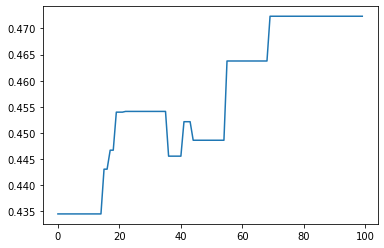

In [270]:
import matplotlib.pyplot as plt
plt.plot(data["sentiments"])

In [271]:
def clean_time(time):
    t = time.replace("+0000 ","")
    return t
data['time'] = data['time'].apply(clean_time)

In [272]:
"""import plotly.express as px
fig = px.line(df, y="sentiment", labels={'x':'sentiment', 'y':'time'}, text=df['time'])
# add hover_name="topic"


fig.show()"""

'import plotly.express as px\nfig = px.line(df, y="sentiment", labels={\'x\':\'sentiment\', \'y\':\'time\'}, text=df[\'time\'])\n# add hover_name="topic"\n\n\nfig.show()'

In [273]:
def getindex(y_pred):
    start = y_pred.index.start
    stop = y_pred.index.stop
    step = y_pred.index.step
    l = []
    for i in range(start, stop, step):
        l.append(i)
    return l

In [344]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(y=data['sentiments'],
                                mode='lines+markers',
                                name='ground truth',
                                text=(data['time'])))

fig.update_layout(title=f"Sentiment Analysis of @{user} twitter interactions")
fig.show()

In [275]:
fig = go.Figure(data=go.Scatter(y=data['retweets'],
                                mode='lines+markers',
                                #marker_color=df['sentiment'],
                                text=data['time'])) # hover text goes here


fig.update_layout(title=f"Retweet Analysis of @{user} twitter interactions")
fig.show()

## Sentiment Change Prediction

### AR

In [47]:
from statsmodels.tsa.stattools import ARMA
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.7/site-packages/patsy/constraint.py:13: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working



In [285]:
y_train = data["sentiments"][0:95]
y_test = data["sentiments"][95:]

In [286]:
model = AR(y_train)

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:691: FutureWarning:


statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)




In [313]:
model_fit = model.fit(maxlag=10)
y_pred = model_fit.predict(start=len(y_train),
                                    end=len(y_train)+len(y_test)-1, dynamic=False)

In [288]:
mean_squared_error(y_test, y_pred, squared=False)

0.00030134093938875736

[99, 100, 101, 102, 103, 104]

In [349]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=data['sentiments'],
                                mode='lines+markers',
                                name='ground truth',
                                text=(data['time'])))

"""fig.add_trace(go.Scatter(y=y_pred, x=getindex(y_pred),
                                mode='lines+markers',
                                 name='predictions',
                                text=(data['time'])))"""


fig.add_trace(go.Scatter(y=future_pred, x=list(range(99,105)),
                                mode='lines+markers',
                                 name='predictions',
                                text=(data['time'])))

fig.update_layout(title=f"Sentiment Analysis of @{user} twitter interactions")
fig.show()

In [318]:
y_train = data["sentiments"][0:99]
model = AR(y_train)
model_fit = model.fit(maxlag=10)
future_pred = model_fit.predict(start=99, end=105, dynamic=False)

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:691: FutureWarning:


statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)




In [319]:
future_pred

99     0.472246
100    0.472168
101    0.472087
102    0.472013
103    0.471934
104    0.471869
105    0.471807
dtype: float64

## Autoreg

In [55]:
from statsmodels.tsa.ar_model import AutoReg

In [56]:
y_train = data["sentiments"][0:90]
y_test = data["sentiments"][90:-1]

In [57]:
model = AutoReg(y_train, lags=29)
model_fit = model.fit()

In [58]:
y_pred = model_fit.predict(start=len(y_train), end=len(y_train)+len(y_test)-1, dynamic=False)

In [59]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=data['sentiments'],
                                mode='lines+markers',
                                name='ground truth',
                                text=(data['time'])))

fig.add_trace(go.Scatter(y=y_pred, x=getindex(y_pred),
                                mode='lines+markers',
                                 name='predictions',
                                text=(data['time'])))

fig.update_layout(title=f"Sentiment Analysis of @{user} twitter interactions")
fig.show()

### ARMA

In [63]:
y_train = data["sentiments"][0:90]
y_test = data["sentiments"][90:-1]

In [64]:
model = ARMA(y_train, (1,10))

In [65]:
model_fit = model.fit(maxlag=10)
y_pred = model_fit.predict(start=len(y_train),
                                    end=len(y_train)+len(y_test)-1, dynamic=False)

In [66]:
mean_squared_error(y_test, y_pred, squared=False)

0.00935785941318295

In [67]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=data['sentiments'],
                                mode='lines+markers',
                                name='ground truth',
                                text=(data['time'])))

fig.add_trace(go.Scatter(y=y_pred, x=getindex(y_pred),
                                mode='lines+markers',
                                 name='predictions',
                                text=(data['time'])))

fig.update_layout(title=f"Sentiment Analysis of @{user} twitter interactions")
fig.show()

## ARIMA

In [68]:
from statsmodels.tsa.arima_model import ARIMA

In [69]:
model = ARIMA(y_train, (1,1,1))

In [70]:
model_fit = model.fit(maxlag=10)
y_pred = model_fit.predict(start=len(train),
                                    end=len(train)+len(test)-1, dynamic=False)

NameError: name 'train' is not defined

In [ ]:
mean_squared_error(y_test, y_pred, squared=False)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=data['sentiments'],
                                mode='lines+markers',
                                name='ground truth',
                                text=(data['time'])))

fig.add_trace(go.Scatter(y=y_pred, x=getindex(y_pred),
                                mode='lines+markers',
                                 name='predictions',
                                text=(data['time'])))

fig.update_layout(title=f"Sentiment Analysis of @{user} twitter interactions")
fig.show()